<a href="https://colab.research.google.com/github/SamatmaAB/Samatma-Bharadwaj/blob/main/Multi_Class_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 Dynamic Image Classifier – More than 2 Classes


📌 1. Upload Your Dataset
👉 Folder structure should look like:

```
dataset/
 ├── class1/
 │     ├── img1.jpg
 │     ├── img2.jpg ...
 ├── class2/
 │     ├── img1.jpg ...
 └── class3/
       ├── img1.jpg ...
```



In [ ]:
from google.colab import files
import zipfile, os

# Upload dataset.zip (with multiple class folders inside)
uploaded = files.upload()

# Unzip into "data" folder
with zipfile.ZipFile("multiclass dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

# Show class folders
os.listdir("data/multiclass dataset")

Saving multiclass dataset.zip to multiclass dataset (2).zip


['Saree', 'Jeans', '.DS_Store', 'T Shirt']

### 👀 2. Load & Visualize Images

Found 28 files belonging to 3 classes.
Detected classes: ['Jeans', 'Saree', 'T Shirt']


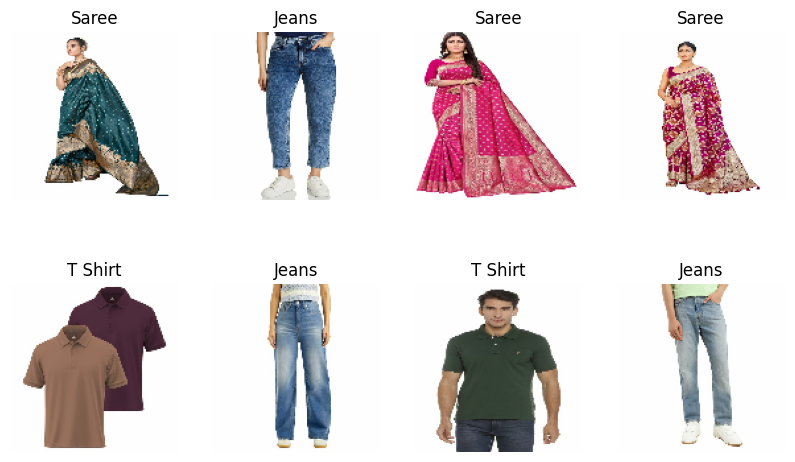

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

img_height, img_width = 128, 128
batch_size = 8

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/multiclass dataset",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Auto-detected class names
class_names = train_ds.class_names
print("Detected classes:", class_names)

# Students can rename if they want:
# class_map = {i: new_name, ...}
class_map = {i: name for i, name in enumerate(class_names)}

# Show sample images
plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_map[int(labels[i])])
        plt.axis("off")
plt.show()

### 🧮 3. Normalize Images

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

### 🏗️ 4. Build CNN Model

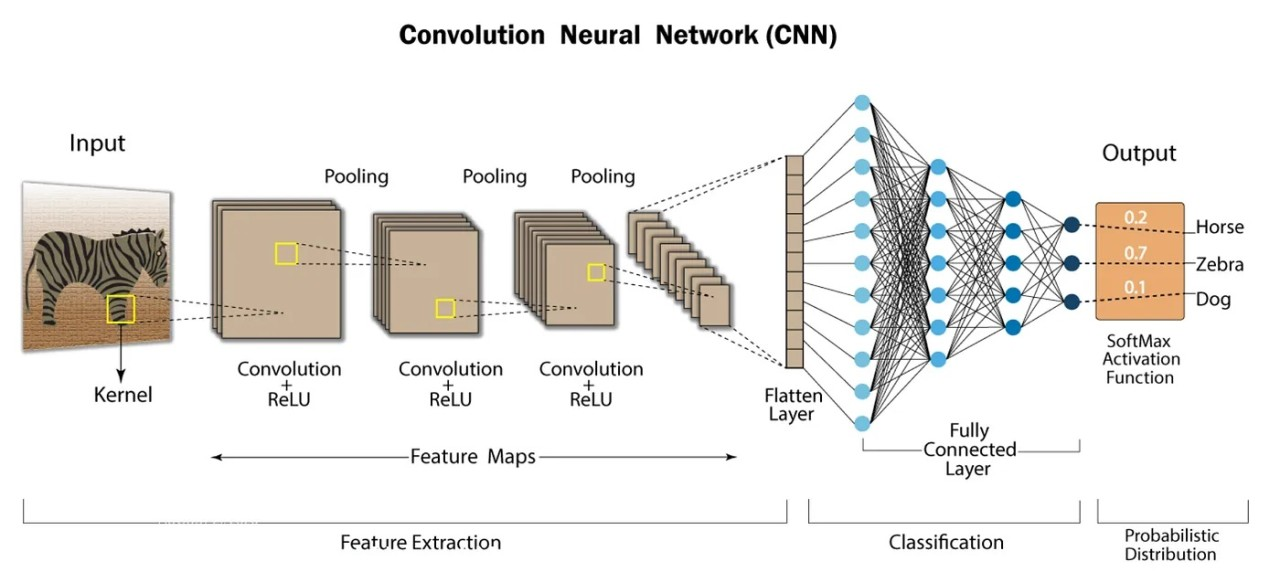

In [ ]:
from tensorflow.keras import layers, models

num_classes = len(class_names)

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')   # multi-class
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

### 🚀 5. Train Model

In [ ]:
history = model.fit(train_ds, epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.3679 - loss: 2.5052
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.5054 - loss: 1.0962
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.7143 - loss: 0.8294
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.8798 - loss: 0.3852
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9155 - loss: 0.1603
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 1.0000 - loss: 0.0180
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 1.0000 - loss: 0.0058
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 1.0000 - loss: 7.8668e-04
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 1.0000 - loss: 5.4971e-04


### 📊 6. Plot Training Curves

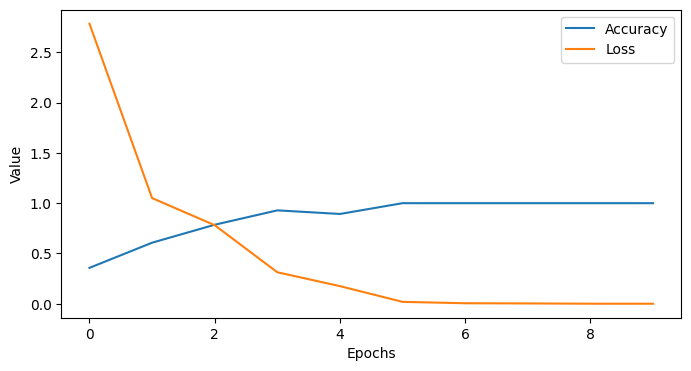

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['loss'], label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()

### 🔮 7. Test on New Images

Saving 5.jpg to 5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


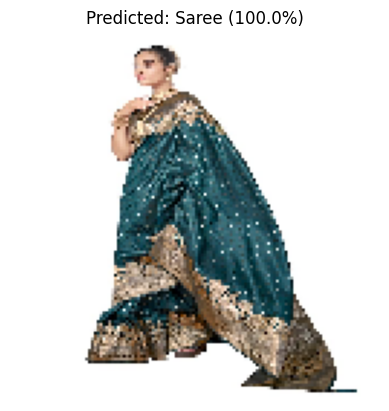

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)
    label = class_map[predicted_class]

    plt.imshow(img)
    plt.title(f"Predicted: {label} ({prediction[predicted_class]*100:.1f}%)")
    plt.axis("off")
    plt.show()

# Upload and test
uploaded = files.upload()
for fn in uploaded.keys():
    predict_image(fn)